In [1]:
import binascii
import random
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns

sns.set(style="ticks")

In [2]:
def filter_string(input_string, replace_char_idx):
    return input_string.replace(input_string[replace_char_idx], '')

In [3]:
filter_string('apples', 1)

'ales'

In [4]:
binascii.hexlify(b'apple')

b'6170706c65'

In [5]:
int(binascii.hexlify(b'apple'), 16)

418498243685

In [6]:
binascii.unhexlify(format(418498243685, 'x'))

b'apple'

In [7]:
len(format(418498243685, 'b'))

39

In [8]:
def gen_bit_string(length=8):
    """
    :param length: int
    :return: str
    """
    return ''.join([random.choice(['0', '1']) for _ in range(length)])

In [9]:
def gen_raw_int(size=8):
    """
    :param size: int
    :return: int
    """
    return int(gen_bit_string(size), 2)

In [10]:
def get_safe_strings(size=4):
    symbols = list('abcdefghijklmnopqrstuvwxyz0123456789!@#$%^&*()_-+=[]{};:\'"",.<>/?')
    return ''.join(random.sample(symbols, size))

In [11]:
def experiment():
    data = {
        'x': [],
        'f(x)': [],
        'input_len': [],
        'raw_string': [],
        'filter_idx': [],
        'output': []
    }
    for i in range(500):
        random_length = random.randint(2, 20)
        random_string = get_safe_strings(size=random_length)

        data['raw_string'].append(random_string)
        data['input_len'].append(len(random_string))
        
        arg = int(binascii.hexlify(random_string.encode('utf8')), 16)
        data['x'].append(arg)
        
        idx = random.randint(0, len(random_string) - 1)
        data['filter_idx'].append(idx)
        
        output = filter_string(random_string, idx)
        data['output'].append(output)
        
        output_bytes = int(binascii.hexlify(output.encode('utf8')), 16)
        data['f(x)'].append(output_bytes)
        
    df = pd.DataFrame(data, columns=['x', 'f(x)', 'input_len', 'filter_idx', 'raw_string', 'output'])
    df['x'] = pd.to_numeric(df['x'])
    df['f(x)'] = pd.to_numeric(df['f(x)'])
    df['x'] = (df['x']-df['x'].min())/(df['x'].max()-df['x'].min())
    df['f(x)'] = (df['f(x)']-df['f(x)'].min())/(df['f(x)'].max()-df['f(x)'].min())
    return df

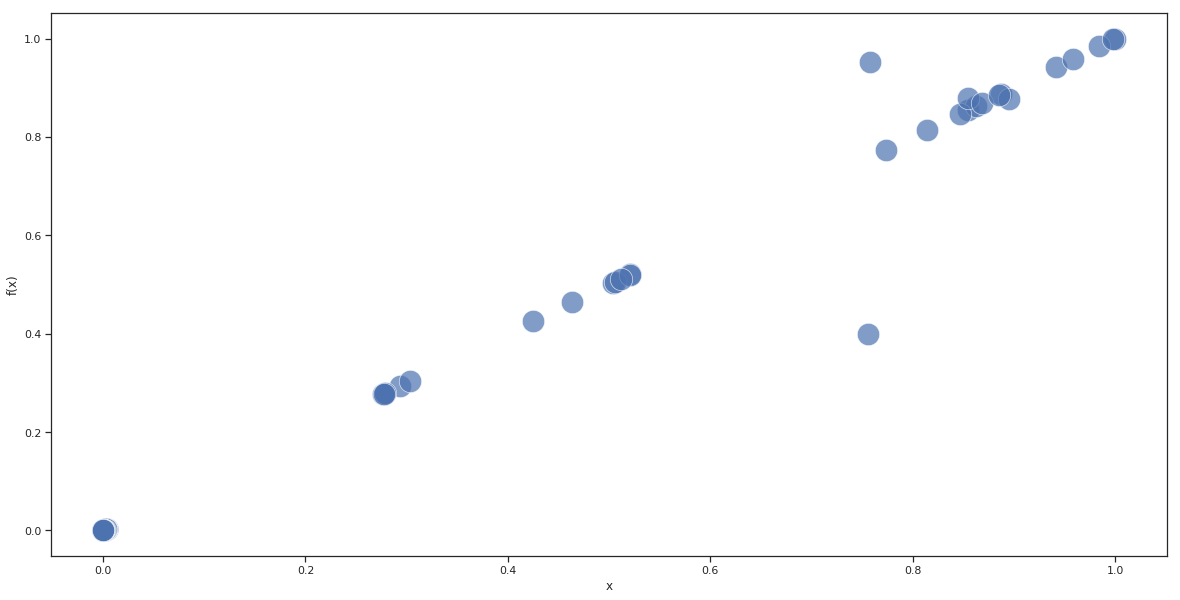

In [12]:
result = experiment()

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(ax=ax, x="x", y="f(x)", data=result, palette='Set2', s=500, alpha=0.7)

In [13]:
def experiment_join():
    data = {
        'x1': [],
        'x2': [],
        'f(x1, x2)': [],
        'raw_string_1': [],
        'raw_string_2': [],
        'output': []
    }
    for i in range(500):
        random_string_1 = get_safe_strings(size=random.randint(3, 20))
        data['raw_string_1'].append(random_string_1)

        random_string_2 = get_safe_strings(size=random.randint(3, 20))
        data['raw_string_2'].append(random_string_2)
        
        arg_1 = int(binascii.hexlify(random_string_1.encode('utf8')), 16)
        data['x1'].append(arg_1)
        
        arg_2 = int(binascii.hexlify(random_string_2.encode('utf8')), 16)
        data['x2'].append(arg_2)
        
        output = random_string_1 + random_string_2
        data['output'].append(output)
        
        output_bytes = int(binascii.hexlify(output.encode('utf8')), 16)
        data['f(x1, x2)'].append(output_bytes)

        df = pd.DataFrame(data, columns=['x1', 'x2', 'f(x1, x2)'])
        df['x1'] = pd.to_numeric(df['x1'])
        df['x2'] = pd.to_numeric(df['x2'])
        df['f(x1, x2)'] = pd.to_numeric(df['f(x1, x2)'])
#         df['x1'] = (df['x1']-df['x1'].min())/(df['x1'].max()-df['x1'].min())
#         df['x2'] = (df['x2']-df['x2'].min())/(df['x2'].max()-df['x2'].min())
#         df['ff(x1, x2)'] = (df['f(x1, x2)']-df['f(x1, x2)'].min())/(df['f(x1, x2)'].max()-df['f(x1, x2)'].min())
    return df

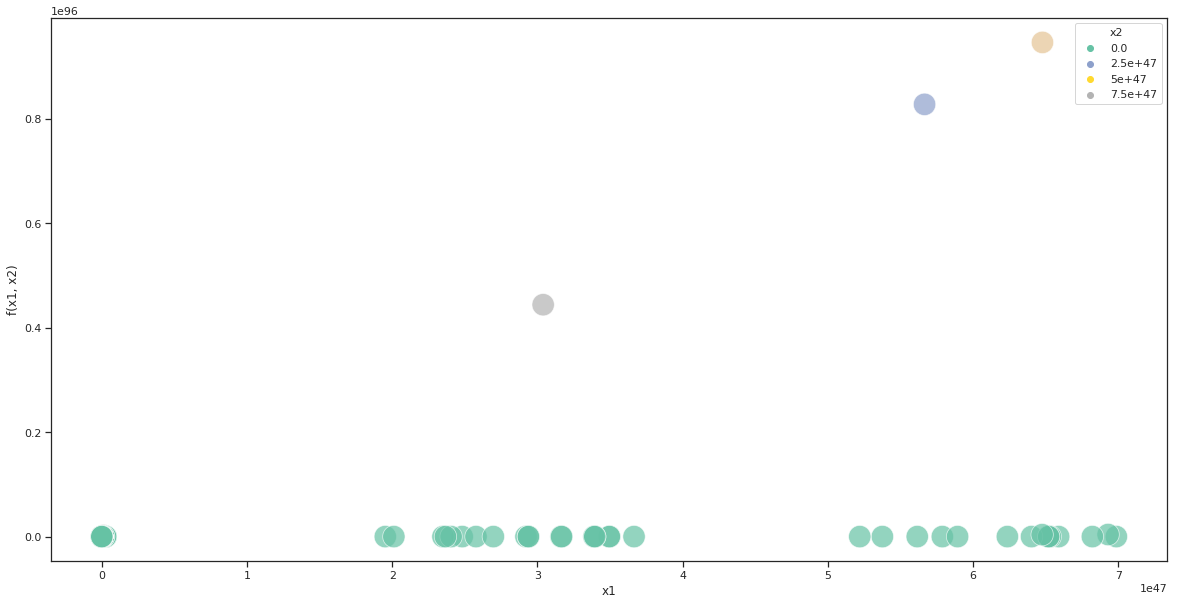

In [14]:
result = experiment_join()

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(ax=ax, x="x1", y="f(x1, x2)", data=result, hue="x2", palette='Set2', s=500, alpha=0.7)

In [15]:
result.head()

,x1,x2,"f(x1, x2)"
0,4.683481e+23,4.156538e+06,7.857577e+30
1,1.347996e+45,2.694695e+18,2.486613e+64
2,3.814067e+28,3.693062e+18,7.035712e+47
3,4.577233e+37,3.109507e+18,8.443505e+56
4,1.303498e+45,3.539522e+28,1.032738e+74


In [16]:
def fib(n): 
    a = 0
    b = 1
    if n == 0:
        return a
    for i in range(n):
        c = a + b
        a = b
        b = c
    return b

In [17]:
def experiment():
    data = {
        'x': [],
        'f(x)': []
    }
    for i in range(1000):
        arg = random.randint(0, 10)
        data['x'].append(arg)
        output = fib(arg)
        data['f(x)'].append(output)
    df = pd.DataFrame(data, columns=['x', 'f(x)'])
    df = (df-df.min())/(df.max()-df.min())
    return df

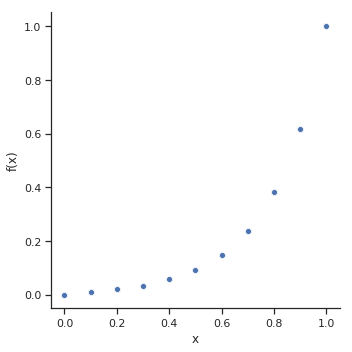

In [18]:
result = experiment()

sns.relplot(x="x", y="f(x)", data=result)

In [19]:
def str_search(haystack, needle):
    if needle in haystack:
        return haystack.index(needle)
    else:
        return -1

In [20]:
def experiment():
    data = {
        'x1': [],
        'x2': [],
        'f(x1, x2)': [],
        'raw_string': [],
        'search_string': []
    }
    for i in range(10000):
        random_length = random.randint(2, 20)
        random_string = get_safe_strings(size=random_length)

        data['raw_string'].append(random_string)
        
        arg = int(binascii.hexlify(random_string.encode('utf8')), 16)
        data['x1'].append(arg)
        
        
        search_string = random.sample(list(random_string), random.randint(0, len(random_string)))
        if len(search_string) == 0:
            search_string = get_safe_strings(size=2)
        else:
            search_string = ''.join(search_string)
        data['search_string'].append(search_string)
        
        arg = int(binascii.hexlify(search_string.encode('utf8')), 16)
        data['x2'].append(arg)
        
        output = str_search(random_string, search_string)

        data['f(x1, x2)'].append(output)
        
        df = pd.DataFrame(data, columns=['x1', 'x2', 'f(x1, x2)', 'raw_string', 'search_string'])
        df['x1'] = pd.to_numeric(df['x1'])
        df['x2'] = pd.to_numeric(df['x2'])
        df['f(x1, x2)'] = pd.to_numeric(df['f(x1, x2)'])

#         df['x1'] = (df['x1']-df['x1'].min())/(df['x1'].max()-df['x1'].min())
#         df['x2'] = (df['x2']-df['x2'].min())/(df['x2'].max()-df['x2'].min())
#         df['f(x1, x2)'] = (df['f(x1, x2)']-df['f(x1, x2)'].min())/(df['f(x1, x2)'].max()-df['f(x1, x2)'].min())
#         df['f(x1, x2)'].fillna(-1, inplace=True)
    return df

In [21]:
result = experiment()

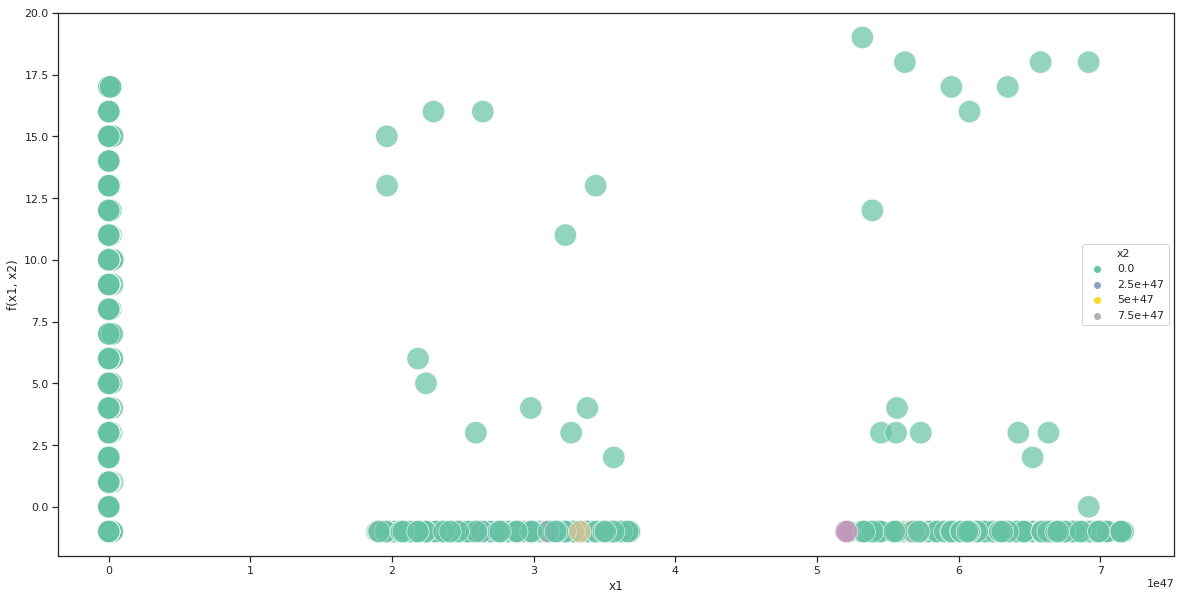

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(ax=ax, x="x1", y="f(x1, x2)", data=result, hue="x2", palette='Set2', s=500, alpha=0.7)

In [23]:
result.head()

,x1,x2,"f(x1, x2)",raw_string,search_string
0,7.088596e+20,1.902768e+21,-1,"&mg<94,5e","g&4<e,9m5"
1,1.801414e+09,1.681943e+09,-1,k_d@,d@k_
2,3.522337e+16,2.980100e+04,-1,}#x.nf;,ti
3,1.582542e+16,2.024528e+11,-1,"89""!/#,","/#!,"""
4,1.584802e+38,2.037848e+23,-1,"w:+#[!7""'.24a/3e","+'2/!3"":ew"


In [32]:
def experiment():
    data = {
        'x1': [],
        'x2': [],
        'f(x1, x2)': [],
        'raw_string': [],
        'length': []
    }
    for i in range(10000):
        random_length = random.randint(2, 20)
        random_string = get_safe_strings(size=random_length)

        data['raw_string'].append(random_string)
        
        arg = int(binascii.hexlify(random_string.encode('utf8')), 16)
        data['x1'].append(arg)
        
        
        compare_length = random.randint(2, 20)
        data['length'].append(compare_length)
        data['x2'].append(compare_length)
        
        output = int(len(random_string) > compare_length)

        data['f(x1, x2)'].append(output)
        
        df = pd.DataFrame(data, columns=['x1', 'x2', 'f(x1, x2)', 'raw_string', 'length'])
        df['x1'] = pd.to_numeric(df['x1'])
        df['x2'] = pd.to_numeric(df['x2'])
        df['f(x1, x2)'] = pd.to_numeric(df['f(x1, x2)'])

#         df['x1'] = (df['x1']-df['x1'].min())/(df['x1'].max()-df['x1'].min())
#         df['x2'] = (df['x2']-df['x2'].min())/(df['x2'].max()-df['x2'].min())
#         df['f(x1, x2)'] = (df['f(x1, x2)']-df['f(x1, x2)'].min())/(df['f(x1, x2)'].max()-df['f(x1, x2)'].min())
#         df['f(x1, x2)'].fillna(-1, inplace=True)
    return df

In [33]:
result = experiment()

,x1,x2,"f(x1, x2)",raw_string,length
0,6.550102e+25,2,1,6.a%rfd&o^],2
1,4.143145e+06,15,0,?8),15
2,1.199019e+26,19,0,c.7p5#(d8/=,19
3,1.964320e+28,20,0,?xz72pw<>hbe,20
4,2.110742e+21,15,0,rln'wy5]-,15
5,4.226258e+11,3,1,bfuc],3
6,2.913321e+28,3,1,"^""m6esk>2)&+",3
7,4.469081e+30,5,1,"8ha=l[-,]m!>s",5
8,7.177114e+25,11,0,;^!<qhyv0c&,11
9,2.724100e+04,17,0,ji,17


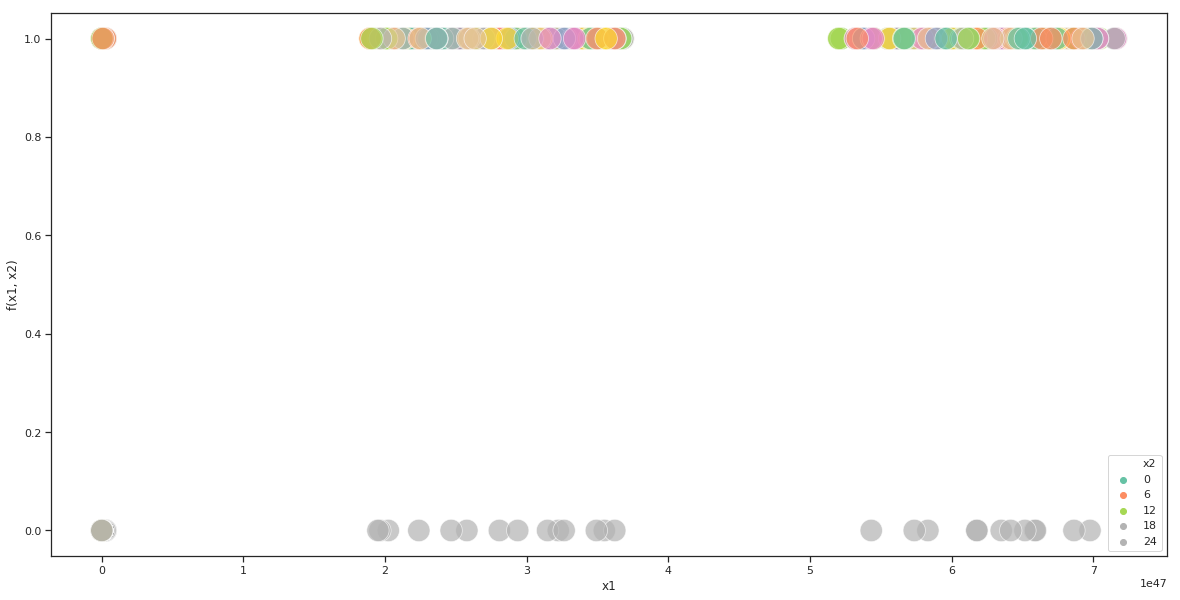

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(ax=ax, x="x1", y="f(x1, x2)", data=result, hue="x2", palette='Set2', s=500, alpha=0.7)

In [35]:
result.head()

,x1,x2,"f(x1, x2)",raw_string,length
0,6.550102e+25,2,1,6.a%rfd&o^],2
1,4.143145e+06,15,0,?8),15
2,1.199019e+26,19,0,c.7p5#(d8/=,19
3,1.964320e+28,20,0,?xz72pw<>hbe,20
4,2.110742e+21,15,0,rln'wy5]-,15
